In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter1d


In [6]:
path_to_files = Path("/home/taheera.ahmed/Desktop/clahe-whole").rglob("*.csv")
path_to_files = list(path_to_files)
path_to_files

[PosixPath('/home/taheera.ahmed/Desktop/clahe-whole/grassland_iou.csv'),
 PosixPath('/home/taheera.ahmed/Desktop/clahe-whole/forest_iou.csv'),
 PosixPath('/home/taheera.ahmed/Desktop/clahe-whole/water_iou.csv'),
 PosixPath('/home/taheera.ahmed/Desktop/clahe-whole/avg_iou.csv'),
 PosixPath('/home/taheera.ahmed/Desktop/clahe-whole/settlement_iou.csv')]

In [ ]:
filenames = [str(file.name).split(".")[0] for file in path_to_files]

files = dict(zip(filenames, path_to_files, strict=False))

{'grassland_iou': PosixPath('/home/taheera.ahmed/Desktop/clahe-whole/grassland_iou.csv'),
 'forest_iou': PosixPath('/home/taheera.ahmed/Desktop/clahe-whole/forest_iou.csv'),
 'water_iou': PosixPath('/home/taheera.ahmed/Desktop/clahe-whole/water_iou.csv'),
 'avg_iou': PosixPath('/home/taheera.ahmed/Desktop/clahe-whole/avg_iou.csv'),
 'settlement_iou': PosixPath('/home/taheera.ahmed/Desktop/clahe-whole/settlement_iou.csv')}

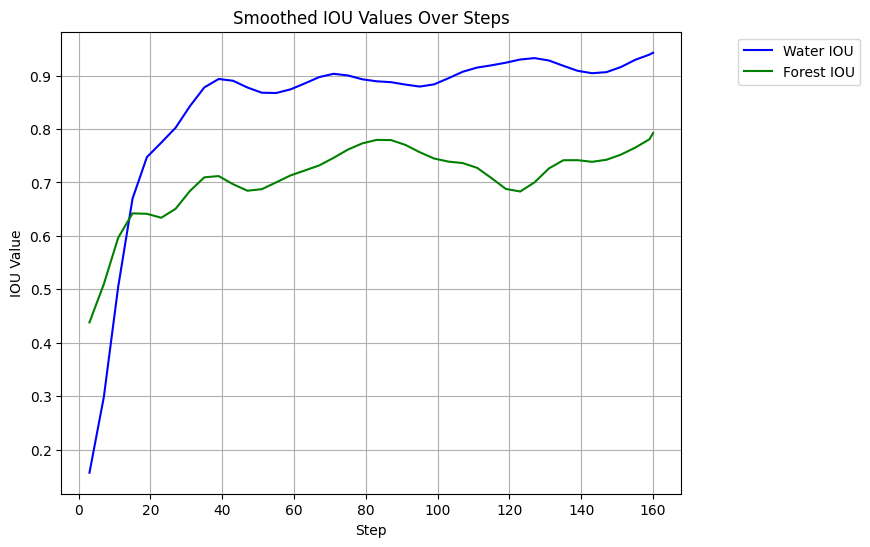

In [57]:
plt.figure(figsize=(8, 6))

grassland = pd.read_csv(files["grassland_iou"])
forest = pd.read_csv(files["forest_iou"])
water = pd.read_csv(files["water_iou"])
avg = pd.read_csv(files["avg_iou"])
settlement = pd.read_csv(files["settlement_iou"])

grassland["Smoothed_Value"] = gaussian_filter1d(grassland["Value"], sigma=1.5)
forest["Smoothed_Value"] = gaussian_filter1d(forest["Value"], sigma=1.5)
water["Smoothed_Value"] = gaussian_filter1d(water["Value"], sigma=1.5)
avg["Smoothed_Value"] = gaussian_filter1d(avg["Value"], sigma=1.5)
settlement["Smoothed_Value"] = gaussian_filter1d(settlement["Value"], sigma=1.5)

# Plot the smoothed values
plt.plot(water["Step"], water["Smoothed_Value"], label="Water IOU", color="blue")
plt.plot(forest["Step"], forest["Smoothed_Value"], label="Forest IOU", color="green")
# plt.plot(
#     grassland["Step"], grassland["Smoothed_Value"], label="Grassland IOU", color="lime"
# )
# plt.plot(
#     settlement["Step"],
#     settlement["Smoothed_Value"],
#     label="Settlement IOU",
#     color="red",
# )
# plt.plot(
#     avg["Step"], avg["Smoothed_Value"], label="Average IOU", color="black", linewidth=4
# )

plt.xlabel("Step")
plt.ylabel("IOU Value")
plt.title("Smoothed IOU Values Over Steps")
plt.legend(
    bbox_to_anchor=(1.30, 1),
)
plt.grid(True)
plt.savefig("water_forest_iou.png", bbox_inches="tight")